# 1. DATA EXPLORATION

In [3]:
import pandas as pd
import numpy as np
import tensorflow 
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [25]:
class_label = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [5]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [6]:
x_train.shape,y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [7]:
x_test.shape,y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [9]:
x_train[0].shape
#32*32 pixels of 3D Red,Green,Blue

(32, 32, 3)

In [29]:
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [32]:
#plotting
def plotsample(x,y,index):
    plt.figure(figsize=(1,1))
    plt.imshow(x[index])
    plt.xlabel(class_label[y[index]])

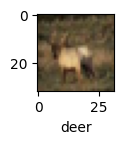

In [36]:
plotsample(x_train,y_train,3)

# 2. Data Normalization

In [39]:
x_train = x_train/255
x_test = x_test/255

In [42]:
#No need: Just use Sparse categorical Crossentropy where Labels are Integers
# y_train_categorical = keras.utils.to_categorical(y_train,num_classes=10)
# y_test_categorical = keras.utils.to_categorical(y_test,num_classes=10)

In [44]:
y_train_categorical.shape

(50000, 10)

# ANN MODEL

In [46]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 52s 33ms/step - loss: 1.8128
Epoch 2/5
1563/1563 [==============================] - 53s 34ms/step - loss: 1.6235
Epoch 3/5
1563/1563 [==============================] - 54s 34ms/step - loss: 1.5424
Epoch 4/5
1563/1563 [==============================] - 53s 34ms/step - loss: 1.4791
Epoch 5/5
1563/1563 [==============================] - 53s 34ms/step - loss: 1.4312


In [47]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 1.4895


1.489500880241394

In [49]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred = model.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print(classification_report(y_test,y_pred_classes))

313/313 [==============================] - 2s 8ms/step
              precision    recall  f1-score   support

           0       0.70      0.45      0.54      1000
           1       0.57      0.58      0.58      1000
           2       0.48      0.18      0.26      1000
           3       0.25      0.63      0.36      1000
           4       0.48      0.34      0.40      1000
           5       0.41      0.31      0.35      1000
           6       0.60      0.41      0.48      1000
           7       0.53      0.59      0.56      1000
           8       0.70      0.51      0.59      1000
           9       0.44      0.68      0.54      1000

    accuracy                           0.47     10000
   macro avg       0.52      0.47      0.47     10000
weighted avg       0.52      0.47      0.47     10000



In [50]:
#ANN is performing really BAD

# Convolutional NN

In [51]:
cnn = models.Sequential([
    #cnn layers
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    #cnn layers
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    #ann layers
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [52]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.4592 - accuracy: 0.4788
Epoch 2/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.1230 - accuracy: 0.6068
Epoch 3/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.9866 - accuracy: 0.6550
Epoch 4/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.9003 - accuracy: 0.6868
Epoch 5/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8336 - accuracy: 0.7107
Epoch 6/10
1563/1563 [==============================] - 26s 16ms/step - loss: 0.7766 - accuracy: 0.7319
Epoch 7/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.7293 - accuracy: 0.7454
Epoch 8/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.6811 - accuracy: 0.7627
Epoch 9/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.6372 - accuracy: 0.7778
Epoch 10/10
1563/1563 [==============================] - 25s 16m

In [53]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.8966 - accuracy: 0.7035


[0.8966281414031982, 0.703499972820282]

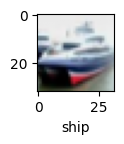

In [55]:
plotsample(x_test,y_test.reshape(-1),1)

In [57]:
y_pred_cnn = cnn.predict(x_test)
y_pred_cnn

313/313 [==============================] - 1s 4ms/step


array([[1.4375213e-02, 2.0807937e-03, 8.4330924e-03, ..., 4.1985733e-04,
        5.5570021e-02, 5.2722986e-03],
       [2.4880113e-03, 3.9280942e-03, 9.8774026e-06, ..., 2.9036806e-09,
        9.9324131e-01, 3.3235212e-04],
       [2.9668698e-01, 4.7643834e-01, 4.4099665e-03, ..., 3.8255166e-02,
        1.5746805e-01, 8.9998813e-03],
       ...,
       [1.2637823e-06, 1.1106382e-06, 3.2746278e-02, ..., 4.4072606e-03,
        2.7896372e-06, 3.1029729e-06],
       [3.7465128e-01, 3.9936647e-01, 1.2163459e-02, ..., 4.4515678e-03,
        9.9754427e-04, 8.5858032e-05],
       [2.1979378e-07, 1.2887838e-06, 3.1473261e-05, ..., 9.9795628e-01,
        1.9271646e-07, 6.2670478e-07]], dtype=float32)

In [58]:
y_classes_cnn = [np.argmax(element) for element in y_pred_cnn]
y_classes_cnn[0:5]

[3, 8, 1, 0, 6]

In [59]:
y_test[0:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [60]:
print(classification_report(y_test,y_classes_cnn))

              precision    recall  f1-score   support

           0       0.69      0.77      0.73      1000
           1       0.77      0.83      0.80      1000
           2       0.62      0.58      0.60      1000
           3       0.57      0.47      0.51      1000
           4       0.65      0.66      0.66      1000
           5       0.60      0.64      0.62      1000
           6       0.74      0.79      0.76      1000
           7       0.80      0.72      0.76      1000
           8       0.80      0.82      0.81      1000
           9       0.78      0.75      0.76      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



                  ANN ----------> CNN 
        Accuracy  47%              70%
Computation Time  slower           faster